In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn import mixture

In [2]:
full = pd.read_csv('data/ChodroffGoldenWilson2019_vot.csv', delimiter = ',', na_filter=False)

In [3]:
dc = {'lead':0, 'short.lag':1, 'long.lag':2}
da = {'labial':0,'coronal':1, 'dorsal':2}

In [4]:
full['vot.category'] = full['vot.category'].map(dc)

In [5]:
full['poa2'] = full['poa2'].map(da)

In [6]:
full['lang'] = full[['family', 'language', 'dialect']].apply(lambda x: '_'.join(x), axis=1)

In [7]:
full = full.drop(['family', 'language', 'dialect'], axis=1)

In [8]:
grouped = full.groupby(['lang','vot.category'])
grouped = grouped.filter(lambda x: len(x) == 3)

In [9]:
grouped = grouped.loc[grouped['vot.category'] == dc['short.lag']]

In [10]:
grouped

,vot.category,poa2,vot.mu,lang
0,1,1.0,33.550000,Afro-Asiatic_Amharic_NA
1,1,2.0,43.800000,Afro-Asiatic_Amharic_NA
2,1,0.0,19.000000,Afro-Asiatic_Amharic_NA
8,1,1.0,28.500000,Afro-Asiatic_Dahalo_NA
9,1,2.0,27.000000,Afro-Asiatic_Dahalo_NA
10,1,0.0,20.000000,Afro-Asiatic_Dahalo_NA
17,1,1.0,18.500000,Afro-Asiatic_Musey_NA
18,1,2.0,31.500000,Afro-Asiatic_Musey_NA
19,1,0.0,20.500000,Afro-Asiatic_Musey_NA
20,1,1.0,19.425000,Algic_Ojibwe_Salteaux


In [11]:
x = 0
for idx,row in grouped.iterrows():
    x+=1
x

345

In [12]:
#lang_labels = []
#for idx,row in grouped.iterrows():
#    lang_labels.append(row['lang'])

In [13]:
data  = grouped.values[:,0:3]
langs = grouped.values[:,3]

In [14]:
data.shape

(345, 3)

In [15]:
langs

array(['Afro-Asiatic_Amharic_NA', 'Afro-Asiatic_Amharic_NA',
       'Afro-Asiatic_Amharic_NA', 'Afro-Asiatic_Dahalo_NA',
       'Afro-Asiatic_Dahalo_NA', 'Afro-Asiatic_Dahalo_NA',
       'Afro-Asiatic_Musey_NA', 'Afro-Asiatic_Musey_NA',
       'Afro-Asiatic_Musey_NA', 'Algic_Ojibwe_Salteaux',
       'Algic_Ojibwe_Salteaux', 'Algic_Ojibwe_Salteaux',
       'Altaic_Azerbaijani_NA', 'Altaic_Azerbaijani_NA',
       'Altaic_Azerbaijani_NA', 'Austro-Asiatic_Pnar_NA',
       'Austro-Asiatic_Pnar_NA', 'Austro-Asiatic_Pnar_NA',
       'Austro-Asiatic_Remo_NA', 'Austro-Asiatic_Remo_NA',
       'Austro-Asiatic_Remo_NA', 'Austronesian_Belep_NA',
       'Austronesian_Belep_NA', 'Austronesian_Belep_NA',
       'Austronesian_Madurese_NA', 'Austronesian_Madurese_NA',
       'Austronesian_Madurese_NA', 'Austronesian_Malay_Singaporean',
       'Austronesian_Malay_Singaporean', 'Austronesian_Malay_Singaporean',
       'Austronesian_Tsou_NA', 'Austronesian_Tsou_NA',
       'Austronesian_Tsou_NA', 'Austron

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn.mixture import GMM

In [24]:
model = GMM(n_components=1).fit(data)
logprob, _ = model.score_samples(data)
print (np.max(np.exp(logprob)))

0.2305098801947238


In [25]:
grid = np.linspace(-0.5, 1.5, 100)
x, y, z = np.meshgrid(grid, grid, grid)
X = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T
logprob, _ = model.score_samples(X)
print (np.max(np.exp(logprob)))
# 2.65717824707

print(np.exp(logprob).sum() * (grid[1] - grid[0]) ** 3)
# 0.998503826652

0.041776322909302756
0.008188485968269262


In [26]:
##########

In [30]:
X = data[:,1:]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)


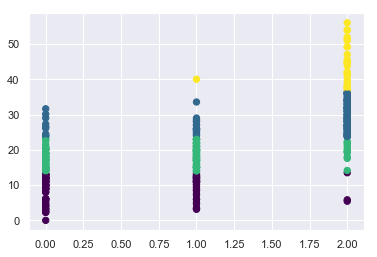

In [31]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [37]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
#     ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

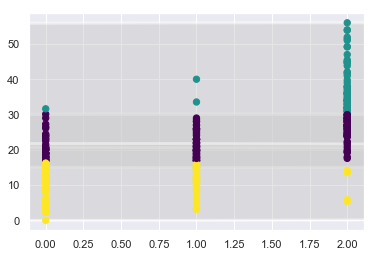

In [38]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

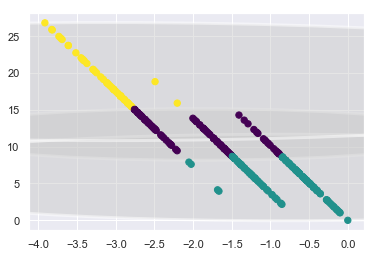

In [42]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

# GMMs

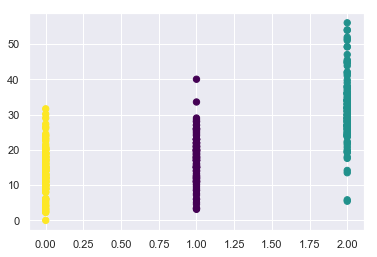

In [43]:
from sklearn.mixture import GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [44]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


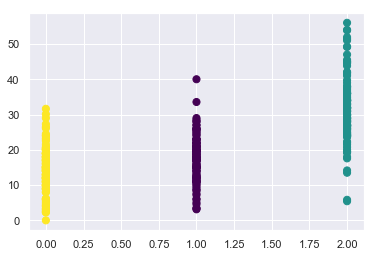

In [45]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [49]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
#     ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

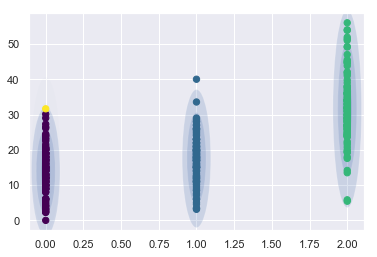

In [50]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

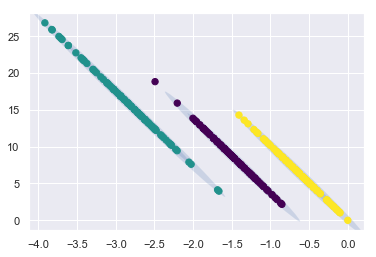

In [52]:
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)